## Feature Scaling 

1. Standard Scaler

In [1]:
### Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Reading the dataset

data = pd.read_csv('C:\Feature_engineering_complete\Datasets\kaggle_diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.shape

(2000, 9)

### Standardization is done on numerical features to get the same scale. 

In [6]:
## Simple for loop for finding numerical features

numerical_features = [x for x in data.columns if data[x].dtype!='O']

In [7]:
numerical_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

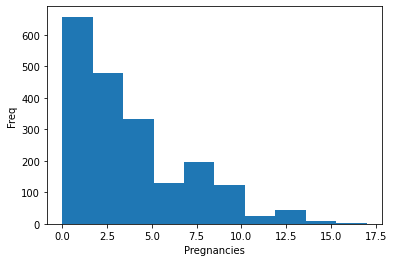

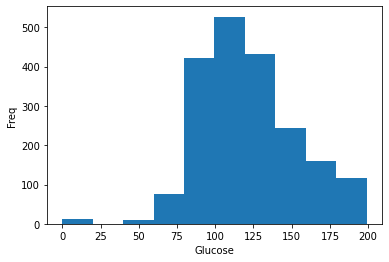

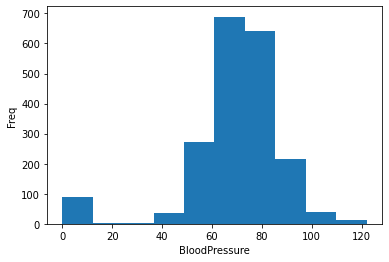

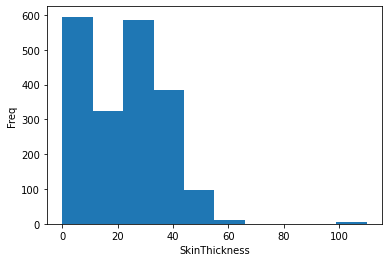

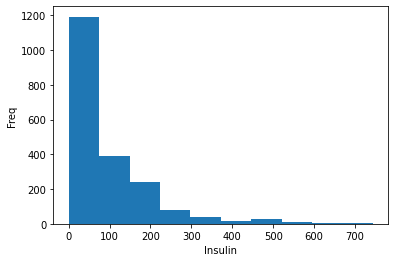

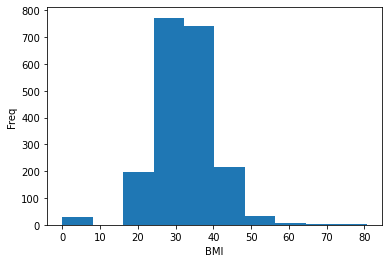

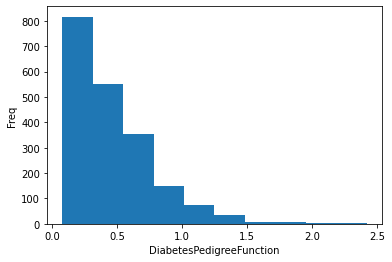

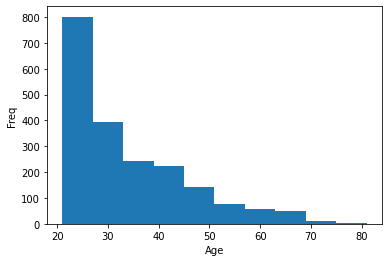

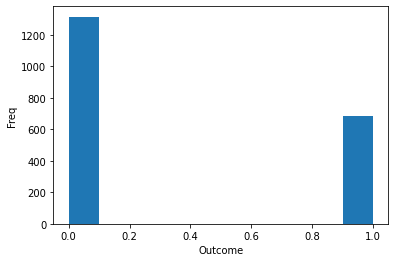

In [8]:
## Now lets plot these features 

for x in numerical_features:
    data[x].plot.hist(bins=10)
    plt.xlabel(x)
    plt.ylabel('Freq')
    plt.show()

### StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. ... This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. It is done by applying Zscore on each feature. 


## Z score = (X-X.mean())/X.std()

### Implementing standard scaler on all X values. 
### It is good practice to fit_transform on X_train and only transform on X_test to avoid bias.

In [9]:
## Dependent and independent features
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [10]:
## Train - test split

from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [11]:
## Implementing Min max scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [17]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.131422,-0.631489,-0.399213,-1.312447,-0.733375,-1.286509,-0.435025,-0.686031
1,-0.509395,-0.287718,-0.076741,0.067426,0.118724,0.257295,-0.500634,-0.600628
2,-0.820408,-1.319031,0.568203,0.255590,-0.397974,-0.843615,0.336657,-0.942241
3,0.734658,-0.600237,0.675694,-1.312447,-0.733375,-0.160292,-0.922404,0.253403
4,-0.820408,-0.819001,0.675694,0.255590,0.898304,0.371182,-0.756820,0.851225


In [19]:
X_test = pd.DataFrame(X_test,columns=X.columns)

X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.423644,-0.225215,0.245731,-1.312447,-0.733375,-0.906885,0.839657,2.046870
1,0.112631,-0.693993,-0.076741,1.070970,-0.733375,0.092791,-1.031751,-0.002806
2,-0.198382,-1.194024,-0.614194,0.631919,-0.570207,0.282603,-0.435025,-0.686031
3,1.356684,-0.350222,0.353222,-1.312447,-0.733375,-0.539916,-0.744323,2.132273
4,0.734658,0.493579,-0.452958,-1.312447,-0.733375,-0.995464,-1.013006,1.876063


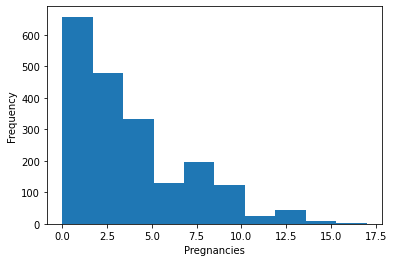

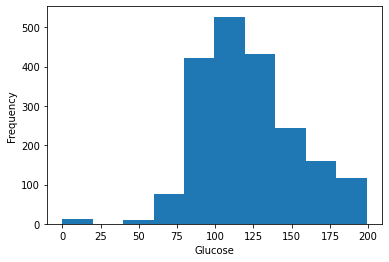

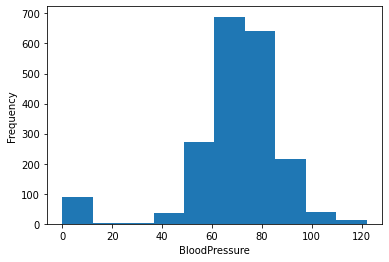

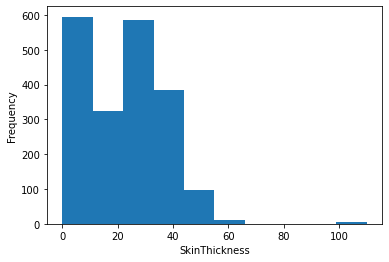

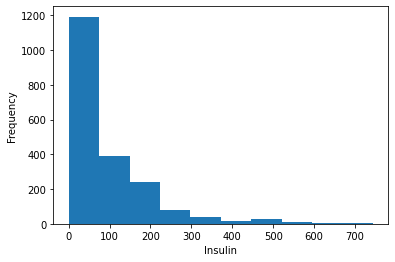

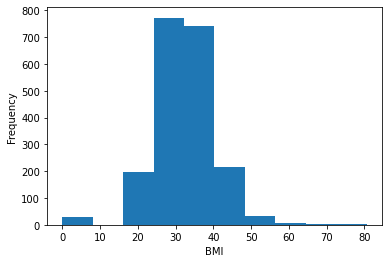

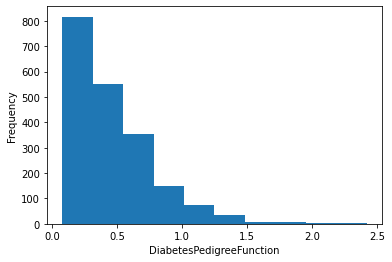

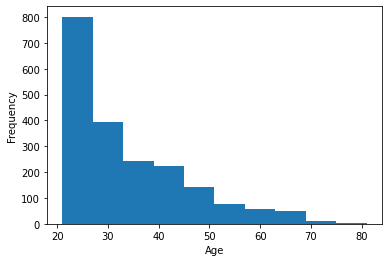

In [18]:
for x in X_train.columns:
    data[x].plot.hist(bins=10)
    plt.xlabel(x)
    plt.show()

## Conclusion  --  Skewness is not changed but the values are all scaled to Standard normal distribution. 